# HR Analytics Project- Understanding the Attrition in HR

**Project Description:**
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading dataset
df = pd.read_csv('C://Users//rahul//OneDrive//Desktop//data trained//internship//Evaluation project//phase 1//HR Analytics Project- Understanding the Attrition in HR- proj_3//WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

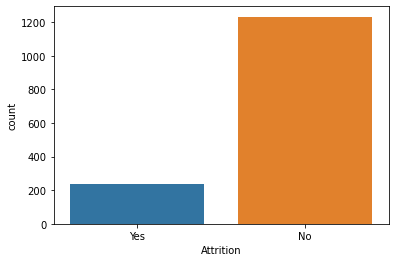

In [7]:
# to elaborate target variable
sns.countplot(x='Attrition', data=df)
plt.show()


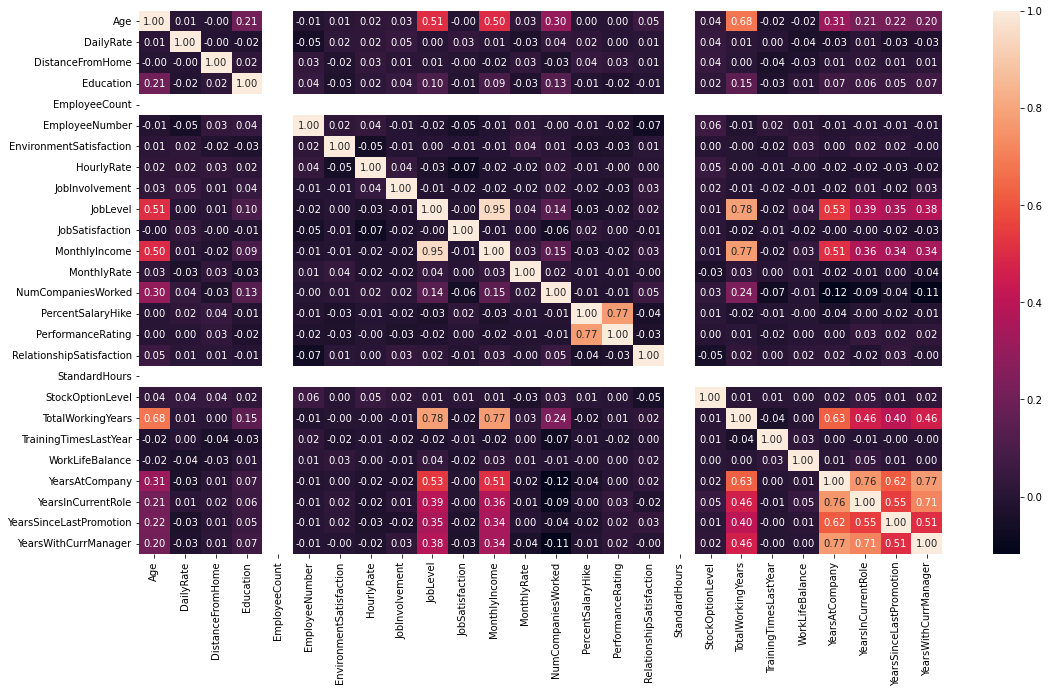

In [9]:
# visualise relationship between independent and dependent variable
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()


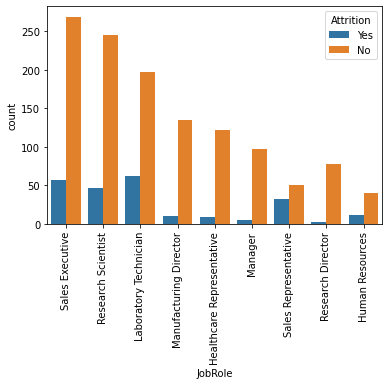

In [16]:
# relation between target and jobrole
g= sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()


In [18]:
# converting categorical vaue to numeric
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [19]:
le = LabelEncoder()

In [29]:
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Gender'] = le.fit_transform(df['Gender'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['JobRole'] = le.fit_transform(df['JobRole'])

In [21]:
# scaling numeric columns
sc = StandardScaler()
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                  'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                  'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
                  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']
df[numerical_cols] = sc.fit_transform(df[numerical_cols])


In [22]:
# divide data to train and test
from sklearn.model_selection import train_test_split

In [31]:
# Model Building 
x = df.drop('Attrition', axis=1)
y = df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
# importing classifier model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [34]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} - Classification Report:\n {classification_report(y_test, y_pred)}")
    print(f"{name} - Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")


Logistic Regression - Accuracy: 0.8877551020408163
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.69      0.28      0.40        39

    accuracy                           0.89       294
   macro avg       0.79      0.63      0.67       294
weighted avg       0.87      0.89      0.87       294

Logistic Regression - Confusion Matrix:
 [[250   5]
 [ 28  11]]

Random Forest - Accuracy: 0.8843537414965986
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       0.86      0.15      0.26        39

    accuracy                           0.88       294
   macro avg       0.87      0.57      0.60       294
weighted avg       0.88      0.88      0.85       294

Random Forest - Confusion Matrix:
 [[254   1]
 [ 33   6]]

Support Vector Machine - Accuracy: 0.867

In [35]:
#Evaluating the model 
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    print(f"{name} - Cross-Validation Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")


Logistic Regression - Cross-Validation Accuracy: 0.8727891156462583 (+/- 0.011094902333537488)
Random Forest - Cross-Validation Accuracy: 0.8551020408163265 (+/- 0.0016663195529137283)
Support Vector Machine - Cross-Validation Accuracy: 0.8387755102040817 (+/- 0.0016663195529137286)
Decision Tree - Cross-Validation Accuracy: 0.7802721088435375 (+/- 0.014366470804042788)
Gradient Boosting - Cross-Validation Accuracy: 0.8619047619047618 (+/- 0.011504445255297775)


In [37]:
# hyperpameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_best_rf)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_best_rf)}\n")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Tuned Random Forest Accuracy: 0.8775510204081632
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
 [[254   1]
 [ 35   4]]



In [38]:
# saving model
import joblib

# Save the final model
joblib.dump(best_rf, 'best_hr_attrition_model.pkl')


['best_hr_attrition_model.pkl']